# 1. Read all cleaned csv files

In [67]:
# Read all cleaned data csv files

import pandas as pd 

rfm_data = pd.read_csv('rfm_data.csv')
newcust_data = pd.read_csv('new_customer_cleaned.csv')
custdemo_data = pd.read_csv('customer_demography_cleaned.csv')
custadd_data = pd.read_csv('customer_address_cleaned.csv')


## RFM data

In [68]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3494 entries, 0 to 3493
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  3494 non-null   int64  
 1   recency      3494 non-null   int64  
 2   frequency    3494 non-null   int64  
 3   monetary     3494 non-null   float64
 4   r_score      3494 non-null   int64  
 5   f_score      3494 non-null   int64  
 6   m_score      3494 non-null   int64  
 7   rfm_score    3494 non-null   int64  
 8   Segment      3494 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 245.8+ KB


## New Customer data

In [69]:
newcust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           983 non-null    object 
 1   last_name                            983 non-null    object 
 2   gender                               983 non-null    object 
 3   past_3_years_bike_related_purchases  983 non-null    int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            983 non-null    object 
 6   job_industry_category                983 non-null    object 
 7   wealth_segment                       983 non-null    object 
 8   deceased_indicator                   983 non-null    object 
 9   owns_car                             983 non-null    object 
 10  tenure                               983 non-null    int64  
 11  address                         

## Customer demographic

In [70]:
custdemo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   first_name                           3913 non-null   object 
 2   last_name                            3913 non-null   object 
 3   gender                               3913 non-null   object 
 4   past_3_years_bike_related_purchases  3913 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3913 non-null   object 
 7   job_industry_category                3913 non-null   object 
 8   wealth_segment                       3913 non-null   object 
 9   deceased_indicator                   3913 non-null   object 
 10  owns_car                             3913 non-null   object 
 11  tenure                        

## Customer Address

In [71]:
custadd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


# 2. Segmentwise state distribution

- Merge `custadd['state']` column with `rfm_data` df based on 'customer_id'.

In [72]:
custadd_data.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10


In [73]:
rfm_data.head(2)

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment
0,1,7,11,9084.45,5,5,5,555,Champions
1,2,128,3,4149.07,1,1,2,112,Lost Customers


In [74]:
len(custadd_data)

3999

In [75]:
len(rfm_data)

3494

- Length of custadd_data and rfm_data varies because we dropped some rows in transaction_data during cleaning.
(Check transaction_data_cleaning.ipynb)

In [76]:
rfm_updated = pd.merge(rfm_data, custadd_data[['customer_id','state']], on ='customer_id')

In [77]:
rfm_updated.head(2)

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment,state
0,1,7,11,9084.45,5,5,5,555,Champions,NSW
1,2,128,3,4149.07,1,1,2,112,Lost Customers,NSW


In [78]:
from collections import defaultdict, Counter

grouped_data = rfm_updated.groupby('Segment')
segmentwise_states = defaultdict(str)
for segment, group in grouped_data:
    segmentwise_states[segment] = group['state'].tolist()
for keys, values in segmentwise_states.items():
    segmentwise_states[keys] = Counter(values)

segmentwise_states

defaultdict(str,
            {' At Risk': Counter({'NSW': 102,
                      'QLD': 46,
                      'VIC': 32,
                      'Victoria': 5}),
             'Average Customers': Counter({'NSW': 559,
                      'VIC': 236,
                      'QLD': 228,
                      'Victoria': 20}),
             'Champions': Counter({'NSW': 63,
                      'QLD': 35,
                      'VIC': 27,
                      'Victoria': 4}),
             'Lost Customers': Counter({'NSW': 584,
                      'VIC': 271,
                      'QLD': 241,
                      'Victoria': 37}),
             'Loyal Customers': Counter({'NSW': 124,
                      'VIC': 54,
                      'QLD': 41,
                      'Victoria': 6}),
             'New Customers': Counter({'NSW': 252,
                      'VIC': 102,
                      'QLD': 92,
                      'Victoria': 7}),
             'Potential Loyalists': Counter

### Plots

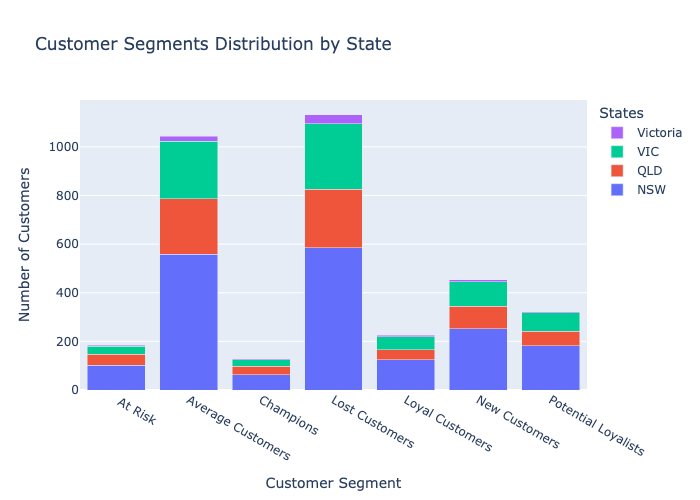

In [79]:
# Extract unique states
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Image
states = sorted(set(state for counts in segmentwise_states.values() for state in counts))

# Create traces for each state
traces = []
for state in states:
    # Create a bar trace for this state
    traces.append(go.Bar(
        x=list(segmentwise_states.keys()),  # Segments on x-axis
        y=[segmentwise_states[segment].get(state, 0) for segment in segmentwise_states],
        name=state
    ))

# Create Figure
fig = go.Figure(data=traces)

# Update layout
fig.update_layout(
    barmode='stack',
    title='Customer Segments Distribution by State',
    xaxis_title='Customer Segment',
    yaxis_title='Number of Customers',
    legend_title='States'
)

# Show plot
# fig.show()
# Save the figure as a static image
pio.write_image(fig, 'customer_segments_by_states.png')

# Display the image in the notebook

Image('customer_segments_by_states.png')






In [80]:
# Number of customers from each state
statewise_customers = rfm_updated.groupby('state').agg({'customer_id': 'count'})
statewise_customers.rename(columns={'customer_id':'number_of_customers'}, inplace=True)
statewise_customers

,number_of_customers
state,
NSW,1866
QLD,743
VIC,798
Victoria,82


# 3. State wise customer distribution

- As we see from previous graph, NSW has the largest share of customers.
- Let' analyse statewise distrbution of customer segments, so statewise startegoes can be created.

In [81]:
rfm_data.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment
0,1,7,11,9084.45,5,5,5,555,Champions
1,2,128,3,4149.07,1,1,2,112,Lost Customers
2,3,102,8,9888.23,1,4,5,145,At Risk
3,4,195,2,1047.72,1,1,1,111,Lost Customers
4,5,16,6,5903.20,4,3,3,433,Average Customers


In [82]:
# Group dataframe by state 
statewise_cust_group = rfm_updated.groupby('state')

# Create a dictionary of statewise segments
statewise_segments = defaultdict(str)
for state, group in statewise_cust_group:
    statewise_segments[state] = group['Segment'].tolist()

for keys, values in statewise_segments.items():
    statewise_segments[keys] = Counter(values)

statewise_segments

defaultdict(str,
            {'NSW': Counter({'Lost Customers': 584,
                      'Average Customers': 559,
                      'New Customers': 252,
                      'Potential Loyalists': 182,
                      'Loyal Customers': 124,
                      ' At Risk': 102,
                      'Champions': 63}),
             'QLD': Counter({'Lost Customers': 241,
                      'Average Customers': 228,
                      'New Customers': 92,
                      'Potential Loyalists': 60,
                      ' At Risk': 46,
                      'Loyal Customers': 41,
                      'Champions': 35}),
             'VIC': Counter({'Lost Customers': 271,
                      'Average Customers': 236,
                      'New Customers': 102,
                      'Potential Loyalists': 76,
                      'Loyal Customers': 54,
                      ' At Risk': 32,
                      'Champions': 27}),
             'Victoria': Count

## Plots

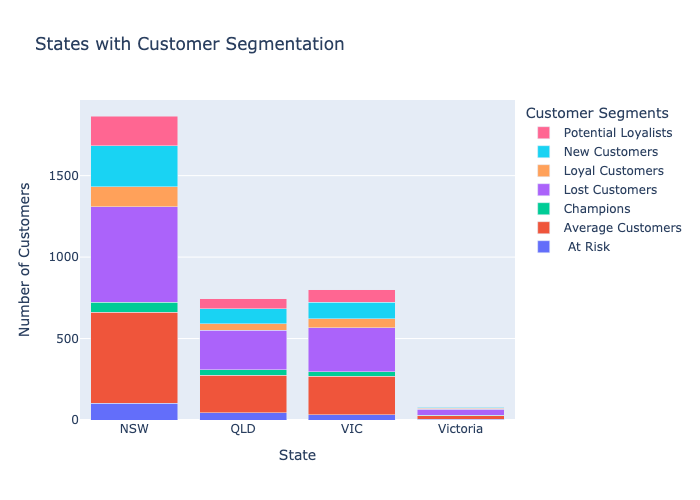

In [83]:
from itertools import count
import plotly.graph_objects as go

segments = list(segmentwise_states.keys())  # For consistent stacking

# Color map for segments
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692']

# Create Figure
fig = go.Figure()

# Add bars for each segment 
for segment, color in zip(segments,colors):
    fig.add_trace(go.Bar(
        name = segment,
        x= list(statewise_segments.keys()),
        y =[statewise_segments[state].get(segment,0) for state in statewise_segments.keys()],
        marker = dict(color=color),
    ))

# Layout for bars
fig.update_layout(
    barmode= 'stack',
    title= 'States with Customer Segmentation',
    xaxis = dict(title= 'State'),
    yaxis = dict(title = 'Number of Customers'),
    legend = dict(title = 'Customer Segments')
)

# fig.show()

# Save the figure as a static image
pio.write_image(fig, 'states_with_segmentation.png')

# Display the image in the notebook

Image('states_with_segmentation.png')

# 4. Agewise Customer Distribution

- Different age group people have different requirements for a bike based on their age.
- Let's divide the customers into 4 age groups:
1. Young age: 18-35
2. Middle age: 36-50
3. Senior age: 51-65
4. Old age: 66 and above

- We will analyse
1. Age wise customer distribution
2. Age group wise profit made by company





In [84]:
# Merge 'age' of custdemo_data to rfm_with_state data

# rfm_with_state = pd.merge(rfm_data, custadd_data[['customer_id','state']], on ='customer_id')
# custdemo_data['age']
rfm_updated = pd.merge(rfm_updated, custdemo_data[['customer_id','age']], on='customer_id')
rfm_updated.head(2)

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment,state,age
0,1,7,11,9084.45,5,5,5,555,Champions,NSW,64
1,2,128,3,4149.07,1,1,2,112,Lost Customers,NSW,37


## 4.1 Agewise Customer Distribution


### (a) Find customer distribution

In [85]:
# Create age group
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Age groups
labels = ['Teens(0-18)', 'Young Adults(19-25)', 'Early Career Age(26-35)', 'Established Career Age(36-45)', 'Middle Age(46-55)','Pre-Retirement Age(55-64)', 'Elderly(65+)']

In [86]:
# Categorize 'age' column into bins
rfm_updated['age_group'] = pd.cut(rfm_updated['age'], bins=bins, labels=labels, right=False)

In [87]:
rfm_updated.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment,state,age,age_group
0,1,7,11,9084.45,5,5,5,555,Champions,NSW,64,Pre-Retirement Age(55-64)
1,2,128,3,4149.07,1,1,2,112,Lost Customers,NSW,37,Established Career Age(36-45)
2,4,195,2,1047.72,1,1,1,111,Lost Customers,QLD,56,Pre-Retirement Age(55-64)
3,5,16,6,5903.20,4,3,3,433,Average Customers,NSW,40,Established Career Age(36-45)
4,6,64,5,5931.69,2,2,3,223,Lost Customers,VIC,51,Middle Age(46-55)


In [88]:
# Group customers by age_group and count customers in each group
age_grouped_customers = rfm_updated.groupby('age_group', observed=False).agg({'customer_id':'count'})

In [89]:
# Rename column
age_grouped_customers.rename(columns={'customer_id': 'number_of_customers'}, inplace=True)

In [90]:
age_grouped_customers

,number_of_customers
age_group,
Teens(0-18),73
Young Adults(19-25),446
Early Career Age(26-35),594
Established Career Age(36-45),1168
Middle Age(46-55),611
Pre-Retirement Age(55-64),515
Elderly(65+),5


### (b) Plot

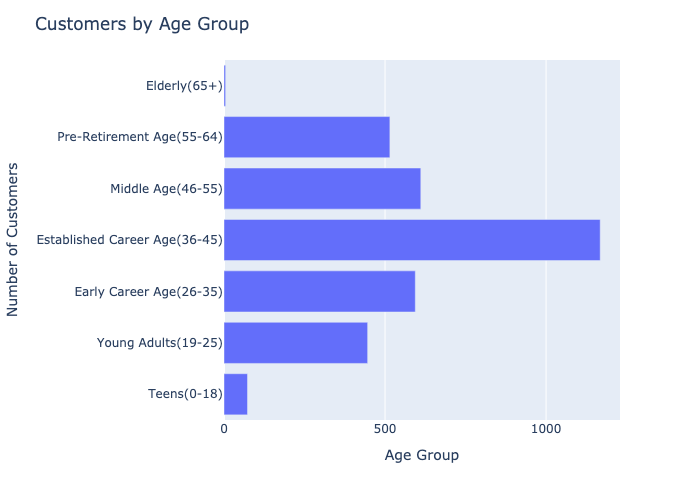

In [91]:
import plotly.express as px

fig = px.bar(age_grouped_customers, orientation='h')
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title= 'Number of Customers',
    title= 'Customers by Age Group',
    showlegend= False
)
# fig.show()

# Save the figure as a static image
pio.write_image(fig, 'customers_by_age.png')

# Display the image in the notebook

Image('customers_by_age.png')

## 4.2 Profit by age
- Group age-wise and sum the profit made from cutomers in each group.

In [92]:
transaction_data = pd.read_csv('transaction_data_cleaned.csv')


In [93]:
rfm_updated = pd.merge(rfm_updated, transaction_data[['customer_id','profit']], on='customer_id')

In [94]:
rfm_updated.head(2)

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment,state,age,age_group,profit
0,1,7,11,9084.45,5,5,5,555,Champions,NSW,64,Pre-Retirement Age(55-64),110.56
1,1,7,11,9084.45,5,5,5,555,Champions,NSW,64,Pre-Retirement Age(55-64),751.02


In [98]:
total_profit = rfm_updated.groupby('age_group', observed=False).agg({'profit':'sum'})

In [99]:
total_profit

,profit
age_group,
Teens(0-18),229477.74
Young Adults(19-25),1415174.07
Early Career Age(26-35),1814447.83
Established Career Age(36-45),3641887.80
Middle Age(46-55),1915766.97
Pre-Retirement Age(55-64),1609273.09
Elderly(65+),17308.68


In [100]:
type(total_profit)

pandas.core.frame.DataFrame

### Plot

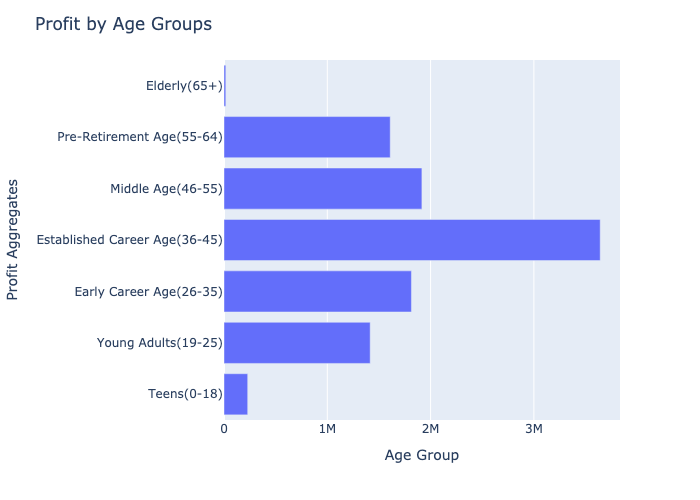

In [102]:
# Plot

fig = px.bar(total_profit, orientation='h')

# Update the layout to include axis labels
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Profit Aggregates',
    title= 'Profit by Age Groups',
    showlegend= False
)

# fig.show()

# Save the figure as a static image
pio.write_image(fig, 'profits_by_age.png')

# Display the image in the notebook

Image('profits_by_age.png')



# 5. Profit by Industry


In [103]:
# Merge industry from customer demography to rfm updated
rfm_updated = pd.merge(rfm_updated, custdemo_data[['customer_id', 'job_industry_category']], on= 'customer_id')

In [104]:
# Group by industry
grouped_by_industry = rfm_updated.groupby('job_industry_category')

# Industry wise profit
profit_by_industry = grouped_by_industry.agg({'profit': 'sum'})


In [105]:
profit_by_industry.reset_index()

,job_industry_category,profit
0,Argiculture,302991.35
1,Entertainment,386109.45
2,Financial Services,2130202.25
3,Health,1652593.94
4,IT,378981.32
5,Manufacturing,2159586.03
6,Property,700139.25
7,Retail,982011.36
8,Telecommunications,187400.01
9,Unknown category,1768146.81


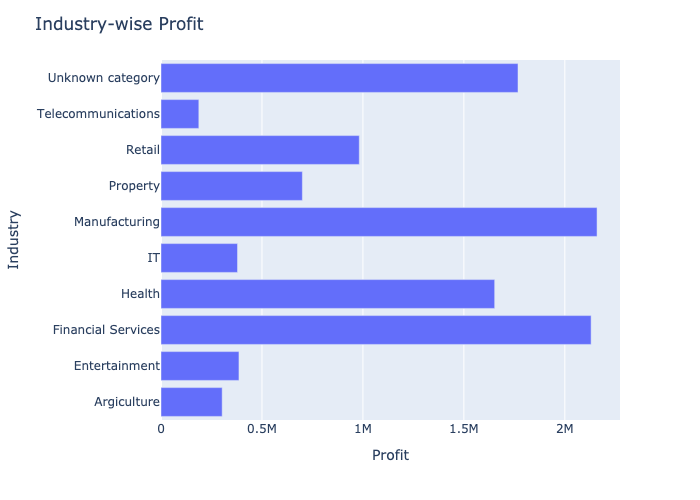

In [110]:
# Plot the profit
data = pd.DataFrame(profit_by_industry)


fig = px.bar(profit_by_industry, orientation='h')
fig.update_layout(
    xaxis_title= 'Profit',
    yaxis_title= 'Industry',
    title= 'Industry-wise Profit',
    showlegend= False
)
# fig.show()

# Save the figure as a static image
pio.write_image(fig, 'profits_by_industry.png')

# Display the image in the notebook

Image('profits_by_industry.png')

# Profit by Segments

In [111]:
segmentwise_profit = rfm_updated.groupby('Segment').agg({'profit':'sum'})

In [115]:
segmentwise_profit

,profit
Segment,
At Risk,805919.74
Average Customers,2905449.30
Champions,720996.22
Lost Customers,2469493.28
Loyal Customers,1268087.20
New Customers,1154205.22
Potential Loyalists,1324010.81


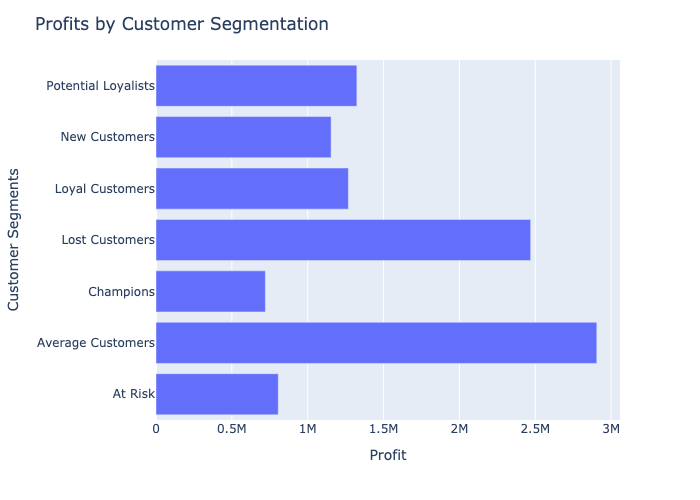

In [114]:
# Plot
fig = px.bar(segmentwise_profit, orientation='h')
fig.update_layout(
    xaxis_title= 'Profit',
    yaxis_title= 'Customer Segments',
    title= 'Profits by Customer Segmentation',
    showlegend= False
)
# fig.show()

# Save the figure as a static image
pio.write_image(fig, 'profits_by_segments.png')

# Display the image in the notebook

Image('profits_by_segments.png')